In [1]:
from train import train_loader, test_loader, val_loader
from model import CNN, Classifier
from ghf import ActGHF

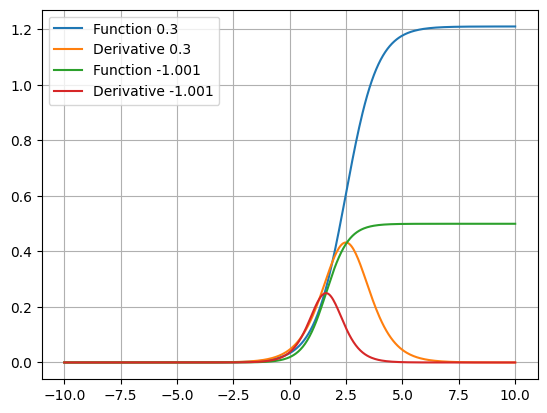

In [60]:
import matplotlib.pyplot as plt
import torch

x = torch.linspace(-10, 10, 400)
t = 0.7
m1 = 0.3
m2 = 50
output = (1 + m1 * t) / (1 + m2*t*torch.exp(-x / t))
grad_s = (1/t) * output * (1 - (1/(1 + m1*t)) * output)
plt.plot(x, output, label=f'Function {m1}')
plt.plot(x, grad_s, label=f'Derivative {m1}')

t = 0.5
m1 = -1.001
m2 = 50
output = (1 + m1 * t) / (1 + m2*t*torch.exp(-x / t))
grad_s = (1/t) * output * (1 - (1/(1 + m1*t)) * output)
plt.plot(x, output, label=f'Function {m1}')
plt.plot(x, grad_s, label=f'Derivative {m1}')


plt.legend()
plt.grid(True)
plt.show()

In [65]:
from pytorch_lightning import Trainer
import pytorch_lightning as pl
max_epochs = 15
num_classes = 10

act = ActGHF(t=0.5, m1=-1.001, m2=50)
model = CNN(activation_fn=act, num_classes=num_classes)
trainer = Trainer(accelerator="gpu", 
    devices=1, 
    max_epochs=max_epochs,
            callbacks=[
            pl.callbacks.ModelCheckpoint(
                monitor="val_acc",        
                mode="max",               
                save_top_k=1,             
                filename="{epoch}-{val_acc:.4f}",  
                save_last=False,          
                verbose=True              
            )
        ],)
        
classifier = Classifier(model, num_classes=num_classes)
trainer.fit(classifier, train_loader, val_loader)
trainer.test(classifier, dataloaders=test_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name               | Type               | Params | Mode 
------------------------------------------------------------------
0 | model              | CNN                | 422 K  | train
1 | cross_entropy_loss | CrossEntropyLoss   | 0      | train
2 | test_accuracy      | MulticlassAccuracy | 0      | train
------------------------------------------------------------------
422 K     Trainable params
0         Non-trainable params
422 K     Total params
1.688     Total estimated model params size (MB)
15        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 797: 'val_acc' reached 0.91122 (best 0.91122), saving model to '/teamspace/studios/this_studio/FashionMNIST/lightning_logs/version_16/checkpoints/epoch=0-val_acc=0.9112.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 1594: 'val_acc' reached 0.91444 (best 0.91444), saving model to '/teamspace/studios/this_studio/FashionMNIST/lightning_logs/version_16/checkpoints/epoch=1-val_acc=0.9144.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 2391: 'val_acc' reached 0.92233 (best 0.92233), saving model to '/teamspace/studios/this_studio/FashionMNIST/lightning_logs/version_16/checkpoints/epoch=2-val_acc=0.9223.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 3188: 'val_acc' reached 0.92467 (best 0.92467), saving model to '/teamspace/studios/this_studio/FashionMNIST/lightning_logs/version_16/checkpoints/epoch=3-val_acc=0.9247.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 3985: 'val_acc' reached 0.92589 (best 0.92589), saving model to '/teamspace/studios/this_studio/FashionMNIST/lightning_logs/version_16/checkpoints/epoch=4-val_acc=0.9259.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 4782: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 5579: 'val_acc' reached 0.93078 (best 0.93078), saving model to '/teamspace/studios/this_studio/FashionMNIST/lightning_logs/version_16/checkpoints/epoch=6-val_acc=0.9308.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 6376: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 7173: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 7970: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 10, global step 8767: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 9564: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 10361: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13, global step 11158: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14, global step 11955: 'val_acc' was not in top 1
`Trainer.fit` stopped: `max_epochs=15` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9204000234603882     │
└───────────────────────────┴───────────────────────────┘

[{'test_acc': 0.9204000234603882}]

In [66]:
# Path to the checkpoint file
import glob 

version = 16
checkpoint_path = f"lightning_logs/version_{version}/checkpoints"
ckp_file = glob.glob(f'{checkpoint_path}/*.ckpt')

cnn_model = CNN(activation_fn=act, num_classes=10)
model = Classifier.load_from_checkpoint(ckp_file[0], model=cnn_model, num_classes=num_classes)
results = trainer.test(model, dataloaders=test_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9222000241279602     │
└───────────────────────────┴───────────────────────────┘